# **Problem Statement 5**

Implement anomaly detection for given credit card dataset using Autoencoder and build the model by using the following steps



```
a.	Import required libraries
b.	Upload / access the dataset
c.	Encoder converts it into latent representation
d.	Decoder networks convert it back to the original input
e.	Compile the models with Optimizer, Loss, and Evaluation Metrics

```



## **Import Necessary packages**

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras import backend as K


## **Upload / Access Dataset**

In [18]:
data = pd.read_csv("/content/ecg_autoencoder_dataset.csv",header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [19]:
features = data.drop(140, axis=1)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [20]:
target = data[140]
target.head()

,140
0,1
1,1
2,1
3,1
4,1


In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target)

train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [22]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

## **Encoder converts it into Latent Representation**

## **Decoder Network convert it back to original input**

In [27]:
class Autoencoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation="relu"),
            Dropout(0.1),
            Dense(32, activation="relu"),
            Dropout(0.1),
            Dense(16, activation="relu"),
            Dropout(0.1),
            Dense(ldim, activation="relu")
        ])

        self.decoder = Sequential([
            Dense(16, activation="relu"),
            Dropout(0.1),
            Dense(32, activation="relu"),
            Dropout(0.1),
            Dense(64, activation="relu"),
            Dropout(0.1),
            Dense(output_units, activation="sigmoid")
        ])

    # The call method should be indented at the same level as __init__
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

Compile Mode

In [28]:
model = Autoencoder(output_units=x_train_scaled.shape[1])

model.compile(loss="msle", optimizer="adam", metrics=['mse'])
epochs=20


In [29]:
h = model.fit(x_train_scaled, x_train_scaled, epochs=epochs, batch_size=512, validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0112 - mse: 0.0254 - val_loss: 0.0130 - val_mse: 0.0305
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mse: 0.0246 - val_loss: 0.0126 - val_mse: 0.0296
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0099 - mse: 0.0224 - val_loss: 0.0121 - val_mse: 0.0284
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0085 - mse: 0.0194 - val_loss: 0.0122 - val_mse: 0.0284
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mse: 0.0165 - val_loss: 0.0123 - val_mse: 0.0285
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0063 - mse: 0.0141 - val_loss: 0.0114 - val_mse: 0.0266
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055 - mse: 0.0124 - val_loss: 0.0113 - val_mse: 0.0263
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0051 - mse: 0.0115 - val_loss: 0.0108 - val_mse: 0.0252
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0048 - mse: 0.0108 - 

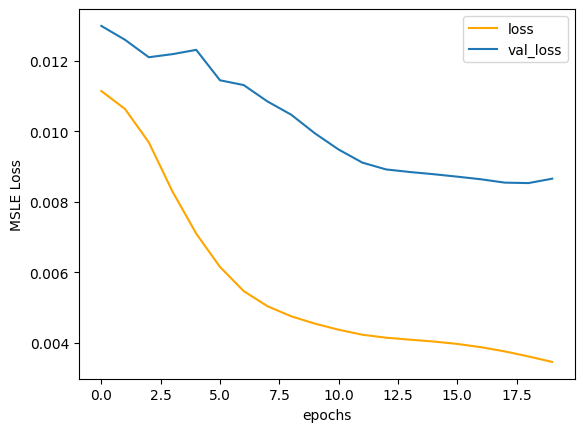

In [30]:
plt.plot(h.history['loss'], label="loss", color="orange")
plt.plot(h.history['val_loss'], label="val_loss")
plt.ylabel("MSLE Loss")
plt.xlabel("epochs")
plt.legend()

In [34]:
def find_threshold(model, x_train_scaled):
  reconstruction = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.msle(reconstruction, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
  return threshold

In [41]:
def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x:0.0 if x == True else 1.0)
  return preds

In [42]:
threshold = find_threshold(model, x_train_scaled)
print(threshold)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.007780382985224542


In [44]:
prediction = get_predictions(model, x_test_scaled, threshold)
accuracy_score(prediction, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.961